In [247]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

In [248]:
np.random.RandomState(12345)

In [249]:

#cs = ["slide_21","slide_22","slide_ 26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [257]:
cs = ["2018_03_21_slide_31",]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)


In [258]:
reload(a2)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [259]:
data = a2.Data(spots_dj=spots_dj)
frames = []
for n, d in data.spots_pd.groupby("Ligand Batch"):
    
    tukey = pairwise_tukeyhsd(endog=d["Intensity"], groups=d["Analyte Batch"])
    frames.append(pd.Series({"Ligand Batch":n,"Distinct Groups":np.count_nonzero(tukey.reject)}))
pepsig = pd.concat(frames, axis=1).transpose().sort_values(by="Distinct Groups", ascending=False)
lb = pd.Series(pepsig["Distinct Groups"].values,index=pepsig["Ligand Batch"])  
#lb = data.ligand_batch_significance().groupby("Ligand Batch").apply(lambda x: x["Significance"].min()).sort_values()

In [260]:
data.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Replica
0,LF-0.05,0.0500,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),674.602524,2345.162311,0.156250,2018_03_21_slide_53,microarray_2018_03_21,1.0,1.0,0.0
1,LF-0.05,0.0500,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),603.955696,1098.766297,0.000000,2018_03_21_slide_53,microarray_2018_03_21,1.0,2.0,1.0
2,LF-0.05,0.0500,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),319.127373,877.997144,0.000000,2018_03_21_slide_53,microarray_2018_03_21,1.0,3.0,2.0
3,LF-0.05,0.0500,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),258.311709,511.974205,0.000000,2018_03_21_slide_53,microarray_2018_03_21,1.0,4.0,3.0
4,LF-0.05,0.0500,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),272.826741,336.834530,0.000000,2018_03_21_slide_53,microarray_2018_03_21,1.0,5.0,4.0
5,LF-0.05,0.0500,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),280.541322,151.792922,0.078125,2018_03_21_slide_53,microarray_2018_03_21,1.0,6.0,5.0
6,LF-0.05,0.0500,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),262.113565,107.120527,0.062500,2018_03_21_slide_53,microarray_2018_03_21,1.0,7.0,6.0
7,LF-0.05,0.0500,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),276.735759,266.404004,0.000000,2018_03_21_slide_53,microarray_2018_03_21,1.0,8.0,7.0
8,LF-0.05,0.0500,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),223.061709,189.352229,0.000000,2018_03_21_slide_53,microarray_2018_03_21,1.0,9.0,8.0
9,LF-0.05,0.0500,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),227.242089,163.733580,0.000000,2018_03_21_slide_53,microarray_2018_03_21,1.0,10.0,9.0


In [261]:
data.x

Ligand Batch                                                    LF-0.0001  \
Analyte Batch                     Collection          Replica               
A/Aichi/2/68(H3N2)-X31-2018-04-13 2018_03_21_slide_58 0.0       92.566456   
                                                      1.0       89.316456   
                                                      2.0       82.935127   
                                                      3.0      641.085174   
                                                      4.0       84.268139   
                                                      5.0       77.996044   
                                                      6.0       73.685127   
                                                      7.0       66.717563   
                                                      8.0       75.926424   
                                                      9.0      426.617036   
                                                      10.0     426.617036   
                                                      11.0     426.617036   
                                                      12.0     426.617036   
                                                      13.0     426.617036   
                                                      14.0     426.617036   
                                                      15.0     426.617036   
                                                      16.0     426.617036   
                                                      17.0     426.617036   
                                                      18.0     426.617036   
                                                      19.0     426.617036   
                                                      20.0     426.617036   
                                                      21.0     426.617036   
                                                      22.0     426.617036   
                                                      23.0     426.617036   
                                                      24.0     426.617036   
                                                      25.0     426.617036   
                                                      26.0     426.617036   
                                                      27.0     426.617036   
                                                      28.0     426.617036   
                                                      29.0     426.617036   
...                                                                   ...   
VicAlla-2018-04-13                2018_03_21_slide_69 24.0     426.617036   
                                                      25.0     426.617036   
                                                      26.0     426.617036   
                                                      27.0     426.617036   
                                                      28.0     426.617036   
                                                      29.0     426.617036   
                                                      30.0     426.617036   
                                                      31.0     426.617036   
                                                      32.0     426.617036   
                                                      33.0     426.617036   
                                                      34.0     426.617036   
                                                      35.0     426.617036   
                                                      36.0     426.617036   
                                                      37.0     426.617036   
                                                      38.0     426.617036   
                                                      39.0     426.617036   
                                                      40.0     426.617036   
                                                      41.0     426.617036   
                                                      42.0     426.617036

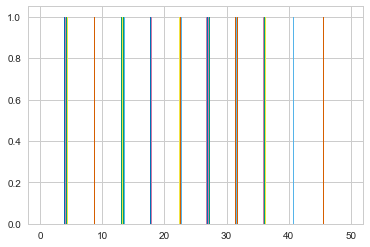

In [262]:
plt.hist(lb)
plt.show()

In [263]:
pbs = [list(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
pbs_len =  [len(lb.index.values[:i]) for i in range(1,len(lb.index.values))]


In [264]:
col = data.spots_pd["Collection"].unique()

train_test =[ tuple(col),tuple(col)]


In [265]:
cs = data.spots_pd["Collection"].unique()

In [266]:

complete = pd.DataFrame(columns=["Test", "Train"])
import itertools

test = list(itertools.product(*data.collection_in_virbatch().values()))

for i, row in enumerate(test[:50]):
    complete.set_value(i, "Test", row)
    complete.set_value(i, "Train", tuple(set(cs) - set(row)))



/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [267]:
complete

,Test,Train
0,"(2018_03_21_slide_41, 2018_03_21_slide_43, 201...","(nan, 2018_03_21_slide_39, 2018_03_21_slide_47..."
1,"(2018_03_21_slide_41, 2018_03_21_slide_43, 201...","(nan, 2018_03_21_slide_39, 2018_03_21_slide_47..."
2,"(2018_03_21_slide_41, 2018_03_21_slide_43, 201...","(nan, 2018_03_21_slide_39, 2018_03_21_slide_47..."
3,"(2018_03_21_slide_41, 2018_03_21_slide_43, 201...","(nan, 2018_03_21_slide_39, 2018_03_21_slide_47..."
4,"(2018_03_21_slide_41, 2018_03_21_slide_43, 201...","(nan, 2018_03_21_slide_39, 2018_03_21_slide_47..."
5,"(2018_03_21_slide_41, 2018_03_21_slide_43, 201...","(nan, 2018_03_21_slide_39, 2018_03_21_slide_47..."
6,"(2018_03_21_slide_41, 2018_03_21_slide_43, 201...","(nan, 2018_03_21_slide_39, 2018_03_21_slide_47..."
7,"(2018_03_21_slide_41, 2018_03_21_slide_43, 201...","(nan, 2018_03_21_slide_39, 2018_03_21_slide_47..."
8,"(2018_03_21_slide_41, 2018_03_21_slide_43, 201...","(nan, 2018_03_21_slide_39, 2018_03_21_slide_47..."
9,"(2018_03_21_slide_41, 2018_03_21_slide_43, 201...","(nan, 2018_03_21_slide_39, 2018_03_21_slide_47..."


In [268]:
pprint(pbs_len)

Pretty printing has been turned OFF


In [270]:
frames = []
#spots_this = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = pb)
data = a2.Data(spots_dj=spots_dj)
#data = clean()

for pb in pbs[:40]:
    ana = a2.Analysis(data.subset_ligand_batches(pb),train_test=complete)
    ana.calculate_all()
    frames.append(ana.complete_information())


*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models****

In [271]:
result = pd.concat(frames , keys =pbs_len)
result.index.names = ["Peptide Batches", 'Analyte Batch',"Collection", "Sample"]
result_mean = result.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean()
result_mean =result_mean.reset_index()
result_mean["Peptide Batches"] = result_mean["Peptide Batches"].astype("float")


In [272]:
result["TrueFalse"].value_counts()

0    421775
1    133975
Name: TrueFalse, dtype: int64

In [273]:
one_virus_data = result[result["y"] == "A/Brisbaine/59/2007(H1N1)-2018-03-20"]
values = pd.DataFrame(one_virus_data.groupby("Peptide Batches")["Predictions"].value_counts())
values.index.names = ['Peptide Batches', 'Virus Batch']
data = pd.pivot_table(values, values=["Predictions"],index=["Peptide Batches"],columns=["Virus Batch"])
data.plot()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1

In [274]:
one_virus_data.groupby(["Peptide Batches","Collection"]).apply(lambda x:  np.amax(x["Predictions"]))
one_virus_data
one_virus_data[one_virus_data.index.get_level_values("Peptide Batches") == 20]["Predictions"].value_counts().idxmax()

ValueError: attempt to get argmax of an empty sequence

In [275]:
result_m = result.groupby(["Peptide Batches","Analyte Batch","Collection"]).apply(lambda x:  x["Predictions"].value_counts().idxmax())
#display(result_m)
result_m = pd.DataFrame(result_m)
result_m = result_m.reset_index().rename(columns={0:"Majority"})
result_m["ms"] = (result_m["Majority"] == result_m["Analyte Batch"]).astype(float)


In [276]:
#result_m_mean = result_m.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean().reset_index()



In [277]:
result_mean["Name"] = "Mean" 
def add_range(df):
    df["unit"]=range(len(df))
    return df

result_mean = result_mean.groupby("Peptide Batches").apply(add_range)

In [278]:
mpl.rcParams['font.family'] = 'San Francisco'
mpl.rcParams['font.family'] = 'bla'

font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)
import seaborn as sns


/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



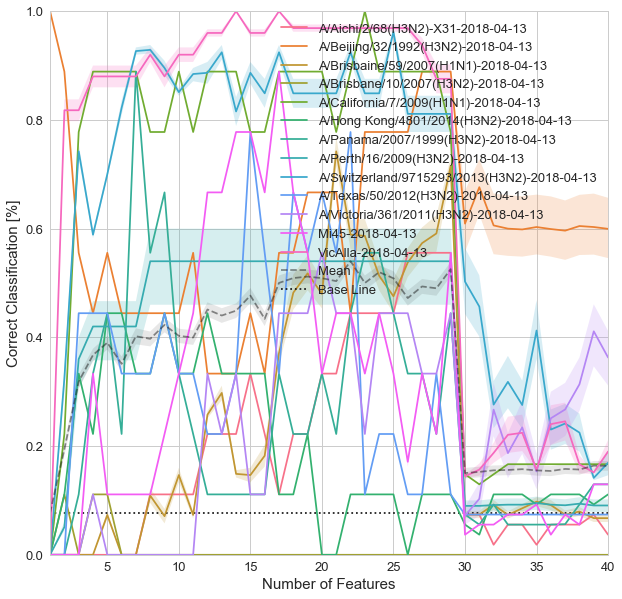

In [279]:
sns.set(style="whitegrid", palette="colorblind", color_codes=True )
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
#ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Analyte Batch", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="unit", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)

ax.hlines(y = 1./len(result_mean["Analyte Batch"].unique()),xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
ax.set_ylim(0,1.0 )
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



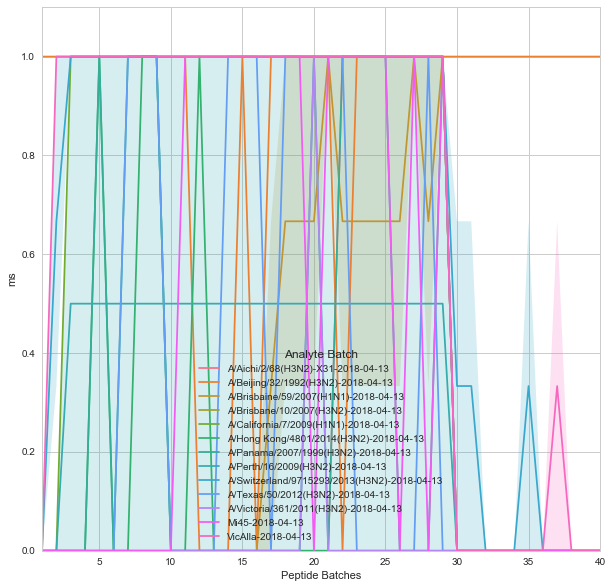

In [280]:


fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m)
ax.set_ylim(0,1.1)
plt.show()

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



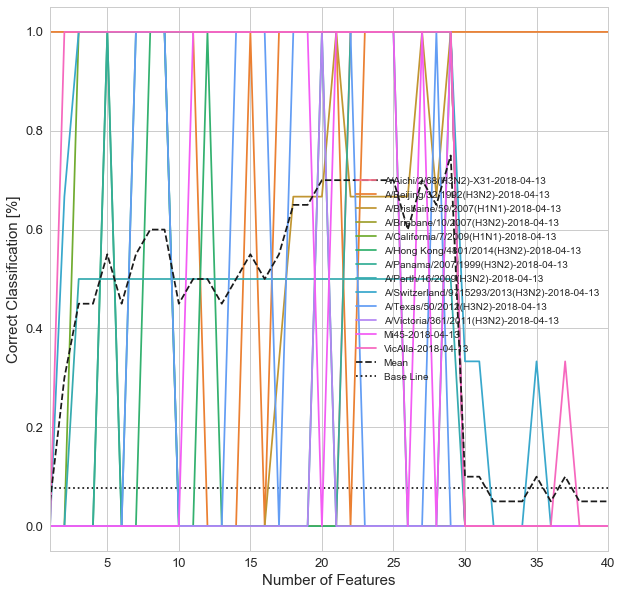

In [281]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m, ci=False)
mean_data = result_m.groupby(["Peptide Batches"]).mean().reset_index()
x = mean_data["Peptide Batches"] 
y = mean_data["ms"] 

ax.plot(x,y,c="k",linestyle="--", label = "Mean")
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.hlines(y = 1./len(result_mean["Analyte Batch"].unique()),xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
plt.legend()

#ax.set_ylim(0,1.1)
plt.show()

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



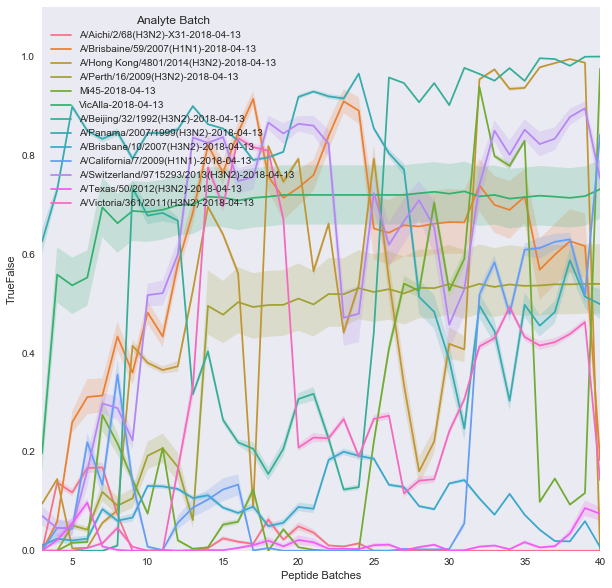

In [177]:
sns.set(style="dark", palette="muted", color_codes=True)
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
ax.set_ylim(0,1.1)
plt.show()

In [128]:
from matplotlib.lines import Line2D

def lda_plot(data, ax,contour=False, **kwargs):
    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, cmap=cmap, label=n,ax=ax ,  shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2",ax=ax, label=n,c=c ,**kwargs)

        
def add_legend(data,ax):
    a=[]
    for n,d in data.groupby("Analyte Batch"):
        a.append(n)
    cmaps = ["Reds","Greens","Blues","Greys"]
    cmmaps = [plt.get_cmap(name) for name in cmaps]
    custom_lines = [Line2D([0], [0], color=c(0.8), lw=8) for c in cmmaps]
    ax.legend(custom_lines,a)

In [129]:
reload(a2)
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(200).clean()

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning:

invalid value encountered in double_scalars



/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning:

The following kwargs were not used by contour: 'label'



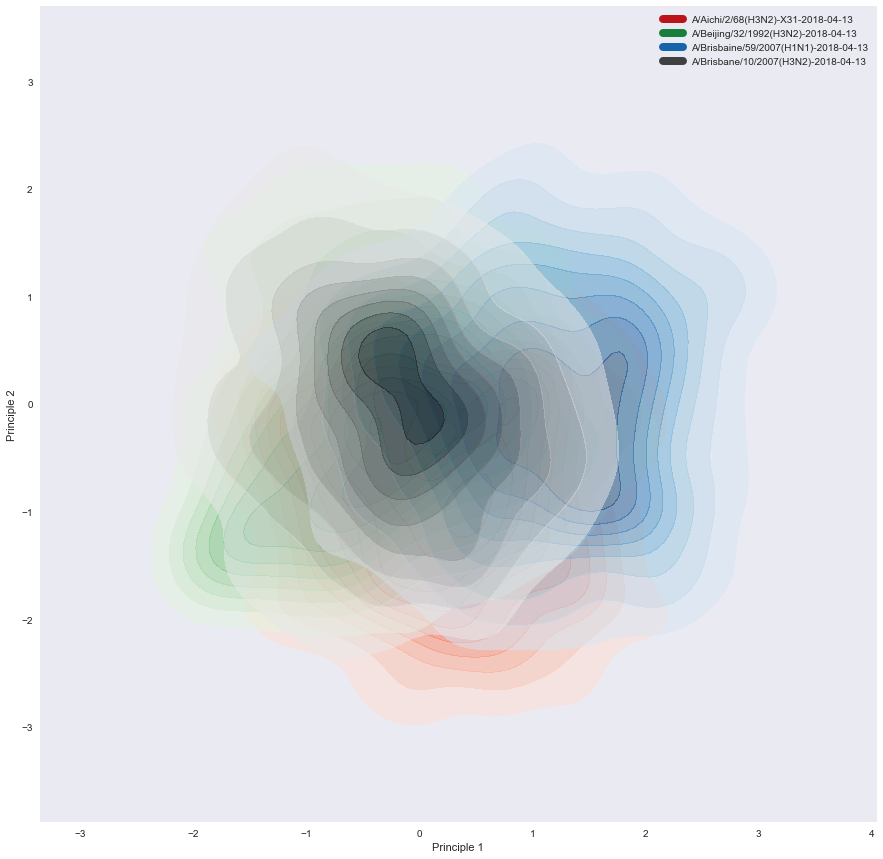

In [130]:

fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

In [131]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go

2.2.3


In [132]:
data = a2.Data(spots_dj=spots_dj)
data = data.outlier_filtering().sample_on_collection(200).clean()
from sklearn import preprocessing

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning:

invalid value encountered in double_scalars



In [133]:
test_data = data.x_pca_fit().transform(data.x)


In [134]:
le = preprocessing.LabelEncoder()

In [135]:
le.fit(data.y_names)
cs = le.transform(data.y_names)

In [136]:
colors =cs.astype(float) / cs.max()

In [137]:


import numpy as np

def lda_plot(data, ax,contour=False, **kwargs):
    colors = sns.color_palette()
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        
        x = d["Principle 1"]
        y = d["Principle 2"]

        
trace1 = go.Scatter3d(
    x=test_data[:,0],
    y=test_data[:,1],
    z=test_data[:,2],
    mode='markers',
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.1
    )
)

this = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_pca = make_pipeline(StandardScaler(), PCA(n_components=3))

std_pca.fit(data.x)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [78]:
dneu = std_pca.transform(data.x)
data1 = pd.DataFrame(dneu[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])

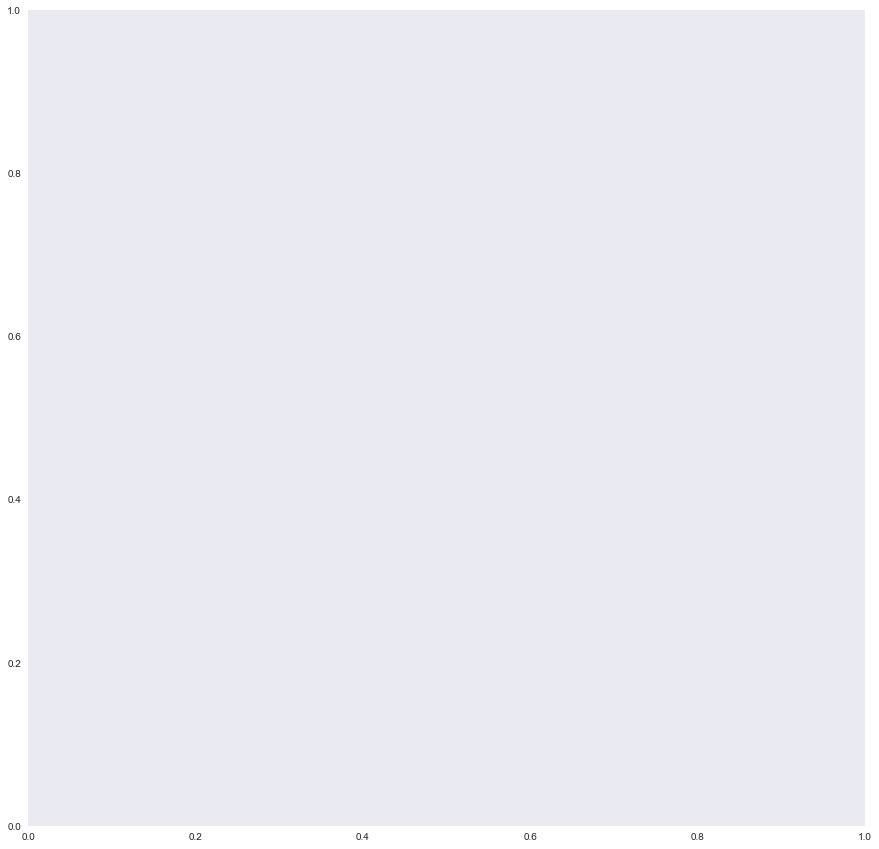

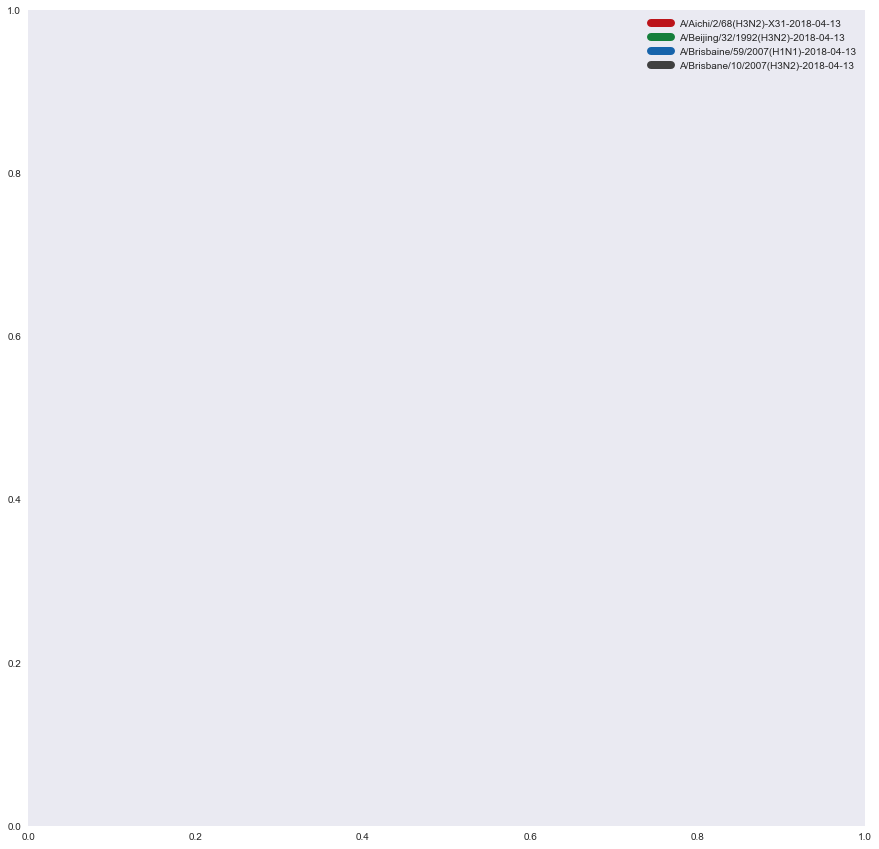

In [79]:
#data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

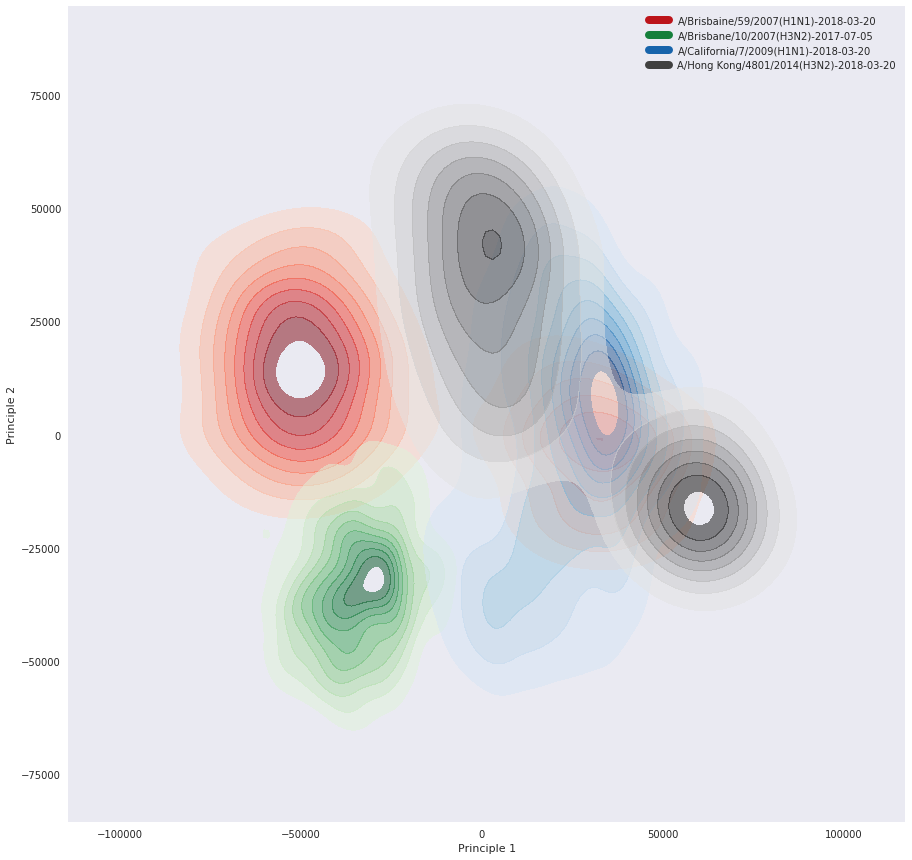

In [652]:
data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,:2],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()